##PCA on MNIST data

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
import pylab as pl
%pylab inline
pl.gray()
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


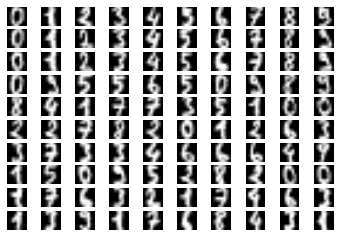

In [4]:
nrows = 10
ncolumns = 10

f, axarr = plt.subplots(nrows, ncolumns)

for i in xrange(nrows):
    for j in xrange(ncolumns):
        axarr[i,j].set_xticks([]) 
        axarr[i,j].set_yticks([]) 
        axarr[i,j].axis('off')
        axarr[i,j].imshow(digits['images'][i*10 + j])

In [5]:
digits_six = load_digits(n_class=6)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
M = scaler.fit_transform(digits_six.data)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=10)
lower_dim = pca.fit_transform(M)

In [10]:
lower_dim.shape

(1083, 10)

In [11]:
def scree_plot(num_components, pca, title=None):
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35, 
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in xrange(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind, 
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)
 

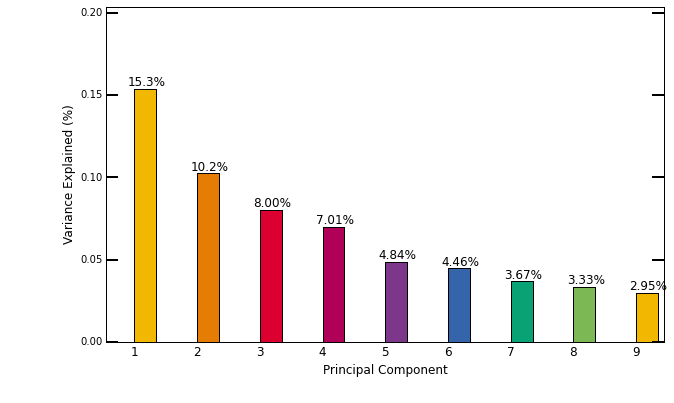

In [12]:
scree_plot(10, pca)

In [13]:
# plot projection

def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

In [14]:
pca_2 = PCA(n_components=2)
lower_dim_2 = pca_2.fit_transform(M)

In [15]:
digits_six.target.shape

(1083,)

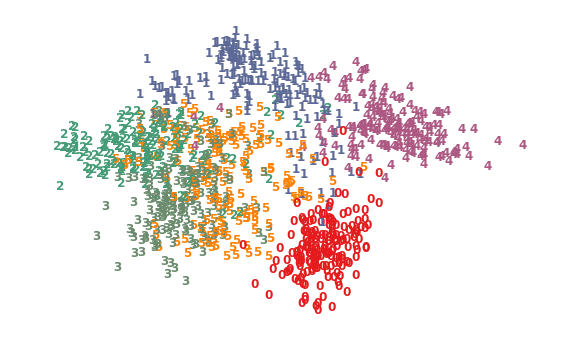

In [16]:
plot_embedding(lower_dim_2, digits_six.target)

In [17]:
# 2 and 3 end up pretty mashed up with each other in 2-D space

##PCA on Cars data

In [18]:
cars = pd.read_table('data/cars.tsv', header=None)

In [19]:
new_df = pd.concat([pd.DataFrame(cars.iloc[:,0].str.split().tolist()), 
                    pd.DataFrame(cars.iloc[:,1])], axis=1, ignore_index=True)

In [20]:
new_df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [21]:
car_df = new_df[new_df[3] != '?'].iloc[:,:8]
# remove non-numeric columns

In [22]:
car_df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year', 'origin']

In [23]:
float_df = car_df.convert_objects(convert_numeric=True)

In [24]:
y = float_df['mpg']

In [25]:
y.max()

46.600000000000001

In [26]:
X = float_df.drop(['mpg', 'origin'], axis=1)
M = scaler.fit_transform(X)

In [27]:
pca_cars = PCA(n_components=6)
pca_cars_X = pca_cars.fit_transform(M)

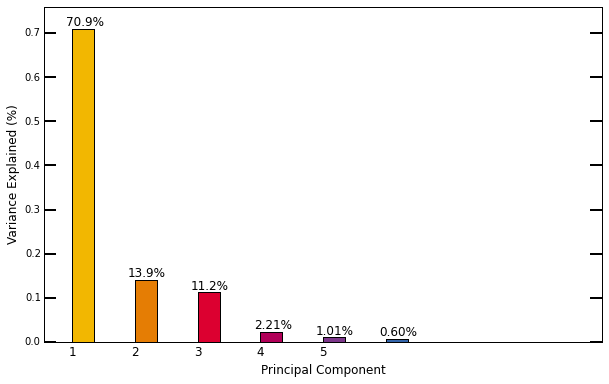

In [28]:
scree_plot(6, pca_cars)

In [30]:
np.asarray(X)

array([[    8. ,   307. ,   130. ,  3504. ,    12. ,    70. ],
       [    8. ,   350. ,   165. ,  3693. ,    11.5,    70. ],
       [    8. ,   318. ,   150. ,  3436. ,    11. ,    70. ],
       ..., 
       [    4. ,   135. ,    84. ,  2295. ,    11.6,    82. ],
       [    4. ,   120. ,    79. ,  2625. ,    18.6,    82. ],
       [    4. ,   119. ,    82. ,  2720. ,    19.4,    82. ]])

In [31]:
X.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
dtype: object

In [107]:
#3 components pretty capture the variance of the data

In [31]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
X = add_constant(X, prepend=False)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 01 Sep 2015   Prob (F-statistic):          3.79e-135
Time:                        16:02:31   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
cylinders       -0.3299      0.332     -0.993   

In [34]:
pca_cars_X

array([[-2.55920186, -1.13480853,  0.07511335,  0.79167959,  0.06513697,
         0.09157649],
       [-3.33258673, -1.04100002,  0.23145702,  0.25484811, -0.29133668,
        -0.09325581],
       [-2.93182743, -1.21308844,  0.46163602,  0.57173796, -0.20940851,
         0.04950284],
       ..., 
       [ 1.18077061,  0.6984733 ,  2.17116216,  0.09868997,  0.30237916,
        -0.16557438],
       [ 1.95953829,  1.33585769, -0.12714825, -0.36082243, -0.04848243,
        -0.04787801],
       [ 1.97212524,  1.42815988, -0.39733895, -0.49320908, -0.09930286,
        -0.01276708]])

In [60]:
pca_cars = PCA(n_components=4)
pca_cars_X = pca_cars.fit_transform(M)

In [37]:
pca_cars_X = add_constant(pca_cars_X, prepend=False)
model = sm.OLS(y, pca_cars_X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     362.2
Date:                Tue, 01 Sep 2015   Prob (F-statistic):          2.25e-129
Time:                        16:06:34   Log-Likelihood:                -1056.0
No. Observations:                 392   AIC:                             2122.
Df Residuals:                     387   BIC:                             2142.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.1779      0.088     36.042      0.0

####PCA did not increase the R-squared or Adjusted R-squared. But let's test it with cross-validation

##Cross-validating PCA on Cars Dataset

In [50]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

In [56]:
cross_val_score(LinearRegression(), X, y, cv=10, scoring='mean_squared_error').mean()

-13.387492432141078

In [61]:
cross_val_score(LinearRegression(), pca_cars_X, y, cv=10, scoring='mean_squared_error').mean()

-14.991356574305701

####The pca version didn't do better...